# Brownian Motion

Brownian Motion is a continous but non-differentiable path whose quadratic variation is not zero. Brownian motion Wₜ: W₀ = 0, increments Wₜ − W_s ∼ N(0, t − s), independent.

Quadratic variation of brownian motion accumulate at a rate of one per unit time. Brownian motion is a martingale. Brownian motion should be F(t) measurable.Markov property: Future increments depend only on the present, not on the past.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def simulate_brownian(T=1.0,N=1000,M=1,seed=None):
    if seed is not None:
        np.random.seed(seed)
    dt=T/N
    dW=np.random.normal(loc=0.0,scale=np.sqrt(dt),size=(M,N))
    W=np.concatenate([np.zeros((M,1)),np.cumsum(dW,axis=1)], axis=1)
    t=np.linspace(0,T,N+1)
    return t,W

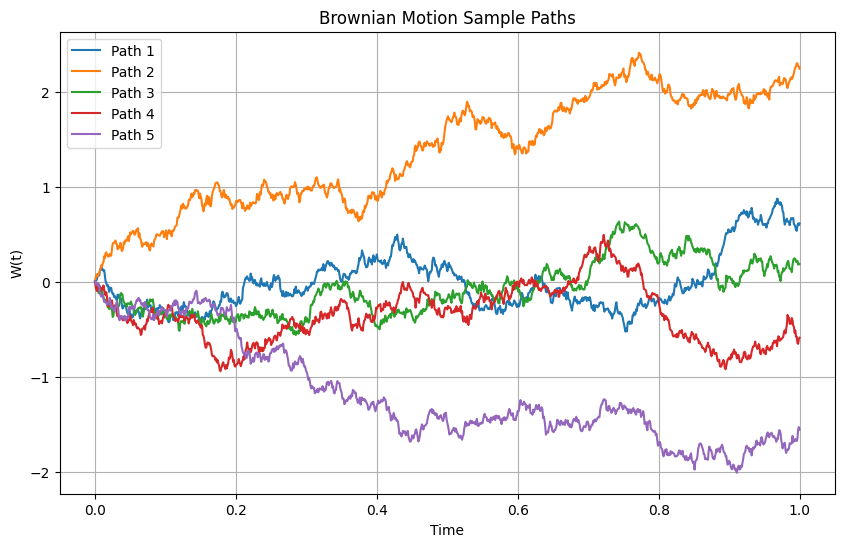

In [14]:
t,W=simulate_brownian(T=1.0,N=1000,M=5,seed=42)
plt.figure(figsize=(10,6))
for i in range(W.shape[0]):   # W.shape[0] = number of paths (M=5 here)
    plt.plot(t, W[i], label=f"Path {i+1}")

plt.title("Brownian Motion Sample Paths")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.legend()
plt.grid(True)
plt.show()

# Geometric Brownian Motion (exact and Euler)

Brownian Motion can take the negative values as well but stock price cannot be negative so we use Geometric Brownian motion to model stock price instead of Brownian motion. 

GBM SDE: dSₜ = μ Sₜ dt + σ Sₜ dWₜ. Exact solution:

#### St=S0*exp((μ−21*σ2)t+σWt)


In [21]:
def simulate_gbm_exact(S0=0.1,mu=0.1,sigma=0.2,T=1.0,N=1000,M=10,seed=None):
    t,W= simulate_brownian(T=T,N=N,M=M,seed=seed)
    exponent= (mu- 0.5*sigma**2)* t[None,:]+ sigma*W
    S=S0*np.exp(exponent)
    return t,S

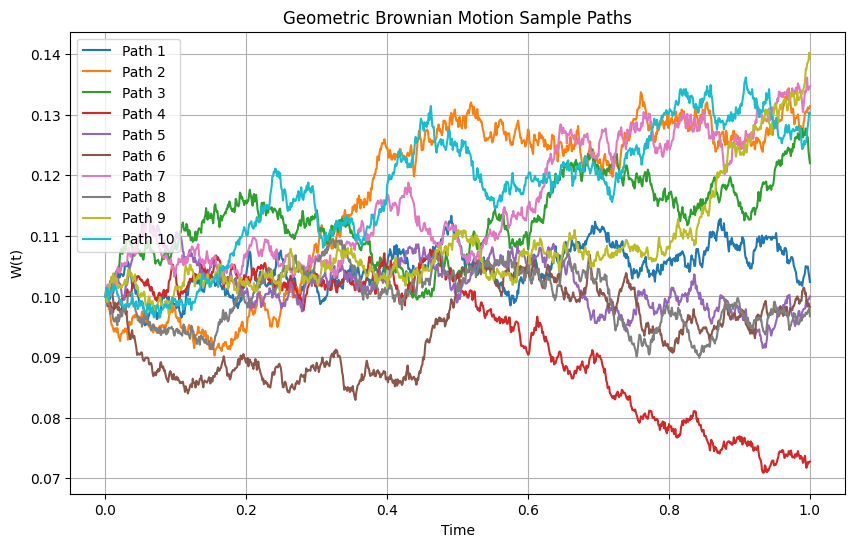

In [22]:
t,W=simulate_gbm_exact()
plt.figure(figsize=(10,6))
for i in range(W.shape[0]):   # W.shape[0] = number of paths (M=5 here)
    plt.plot(t, W[i], label=f"Path {i+1}")

plt.title("Geometric Brownian Motion Sample Paths")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.legend()
plt.grid(True)
plt.show()